# Simulation Customized Node Batch

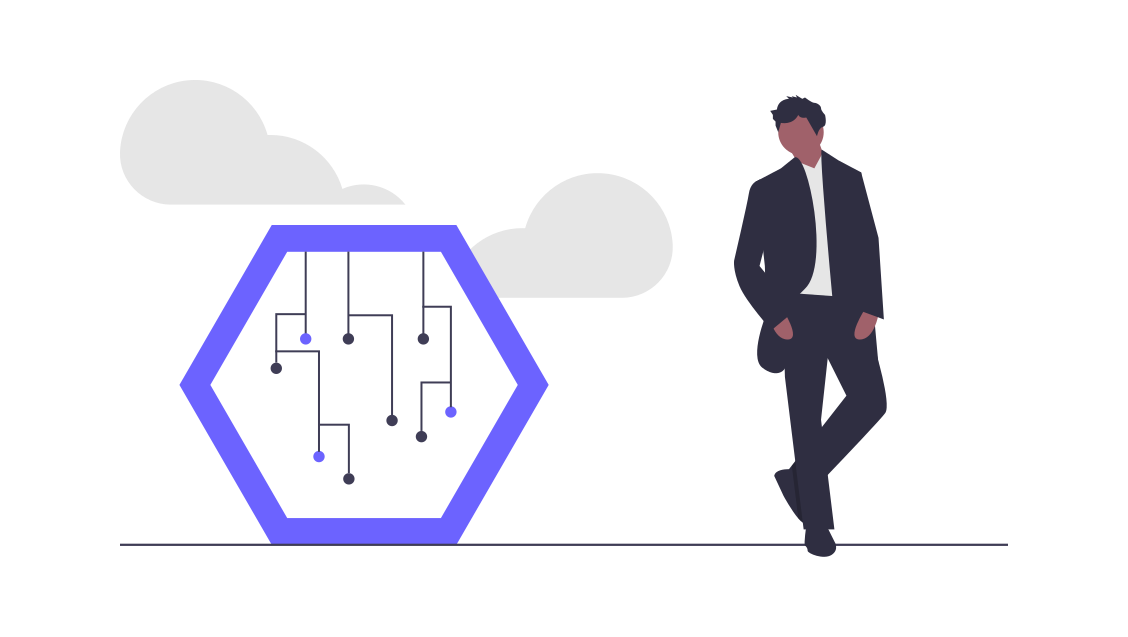


## Input arguments

In [1]:

from lib import *

hwchoice_default = "A_dc_rack"
if j.core.db.get("simulator:hwchoice"):
    hwchoice_default = j.core.db.get("simulator:hwchoice").decode()



In [2]:
#parameters for simulation
# choose your hardware profile (other choices in stead of amd or supermicro or hpe)

simulation = j.tools.tfgrid_simulator.simulation_get(name="default", hardware_config_name="amd", reload=True)
startmonth = int(j.core.db.get("simulator:startmonth").decode())
nb = simulation.nodesbatch_simulate(month=startmonth, hardware_config_name=hwchoice_default)
node_normalized=nb.node_normalized
environment2 = nb.environment;

 - tft_growth: 3.0
 - node_growth: 0:5,6:150,12:1000,18:2000,24:8000,36:12000,48:20000,60:20000
 - cu_price_default: 15
 - su_price_default: 10


## Environment Overview

In [16]:
md(f"""
- Hardware Investment Cost for the node batch : USD {nb.cost_hardware}
- Nr Nodes                 : {nb.nrnodes}
- ROI In Months                 : {nb.roi_months}
- the ROI after 60 months' is:  **{round(nb.roi_end,1)}**
- total amount of TFT farmed: **{nb.tft_farmed_total}**
""")


- Hardware Investment Cost for the node batch : USD 508,176
- Nr Nodes                 : 16
- ROI In Months                 : 15
- the ROI after 60 months' is:  **8.9**
- total amount of TFT farmed: **902883**


## Node Overview (= 1 server)

In [5]:
md(f"""
### Normalized Node Details

- nr of TB netto usable = {round(node_normalized.su,0)} TB
- nr of cpu cores = {round(node_normalized.cru,1)} Cores
- power used = {node_normalized.power} watt
- performance in passmark = {round(node_normalized.cu_passmark*node_normalized.cu)}

""")


### Normalized Node Details

- nr of TB netto usable = 289.0 TB
- nr of cpu cores = 54.0 Cores
- power used = 806 watt
- performance in passmark = 33618



In [6]:
nb.graph_tft(single=True)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': 'c3360bbb…

In [7]:
nb.graph_usd(single=True)

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'farmed',
              'type': 'scat…

In [8]:
nb.graph_usd(single=True,cumul=True)

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'farmed',
              'type': 'scat…

### Token price per month

In [9]:
simulation.graph_token_price()

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'ddf2339e-7bda-4d72-992d-b843b5409b06',
 …

In [10]:
simulation.graph_nr_nodes()

FigureWidget({
    'data': [{'name': 'new nodes',
              'type': 'scatter',
              'uid': '90641…

# Details

## Normalized Node Details

In [11]:
node_normalized


## threefold.simulation.device
 - name                : normalized_device_a.dc.rack
 - description         : 
 - device_template_name: 
 - cost                : 31,761
 - power               : 806
 - rackspace_u         : 2
 - cru                 : 54
 - sru                 : 7080
 - hru                 : 276000
 - mru                 : 432
 - su                  : 289
 - cu                  : 107
 - cu_passmark         : 312
 - su_perc             : 67.93%
 - cu_perc             : 32.07%
 - cpr                 : 450
 - cost_su_capex       : 83.7
 - cost_cu_capex       : 70.4
 - cost_power          : 87.1
 - cost_rack           : 33
 - cost_month          : 649
 - cost_cu_month       : 1.4394545381615664
 - cost_su_month       : 1.7102898737477206


## Environment Details


In [12]:
environment2


## threefold.simulation.environment
 - name                : A_dc_rack
 - description         : 
 - cost_power_kwh      : 0.15
 - cost_rack_unit      : 12
 - cost                : 508,190
 - power               : 12,898
 - rackspace_u         : 44
 - cru                 : 864
 - sru                 : 113280
 - hru                 : 4416000
 - mru                 : 6912
 - su                  : 4624
 - cu                  : 1724
 - cu_passmark         : 4,998
 - su_perc             : 76.12%
 - cu_perc             : 23.88%
 - cpr                 : 7,210
 - cost_su_capex       : 83.7
 - cost_cu_capex       : 70.4
 - cost_power          : 1,392
 - cost_rack           : 528
 - cost_month          : 10,390
 - cost_cu_month       : 1.4394545381615664
 - cost_su_month       : 1.7102898737477206
 - nr_devices          : 18
 - nr_nodes            : 16
 - sales_price_total   : 0


In [13]:
environment2.devices.compute

(11,
 
 ## threefold.simulation.device
  - name                : hpe_compute_server
  - description         : 
  - device_template_name: hpe_compute_server
  - cost                : 20,120
  - power               : 698
  - rackspace_u         : 2
  - cru                 : 64
  - sru                 : 7680
  - hru                 : 96000
  - mru                 : 512
  - su                  : 144
  - cu                  : 127
  - cu_passmark         : 283
  - su_perc             : 57.46%
  - cu_perc             : 42.54%
  - cpr                 : 335
  - cost_su_capex       : 80.3
  - cost_cu_capex       : 67.0
  - cost_power          : 75.4
  - cost_rack           : 24
  - cost_month          : 434
  - cost_cu_month       : 1.4477442092390211
  - cost_su_month       : 1.7345000736322804
 ,
 'n')

In [14]:
try:
    a= environment2.devices.storage
except:
    a=""
a

(5,
 
 ## threefold.simulation.device
  - name                : hpe_storage_server
  - description         : 
  - device_template_name: hpe_storage_server
  - cost                : 55,574
  - power               : 1,004
  - rackspace_u         : 4
  - cru                 : 32
  - sru                 : 5760
  - hru                 : 672000
  - mru                 : 256
  - su                  : 608
  - cu                  : 63
  - cu_passmark         : 377
  - su_perc             : 90.98%
  - cu_perc             : 9.02%
  - cpr                 : 703
  - cost_su_capex       : 83.2
  - cost_cu_capex       : 78.7
  - cost_power          : 108
  - cost_rack           : 48
  - cost_month          : 1,082
  - cost_cu_month       : 1.5322397146735522
  - cost_su_month       : 1.6200412031626554
 ,
 'n')

## Node Batch Details

In [15]:
nb.simulated_months=[]
nb


## threefold.simulation.nodesbatch
 - name                : nodesbatch_simulate_A_dc_rack_0
 - batch_nr            : 0
 - nrnodes             : 16
 - month_start         : 0
 - months_left         : 60
 - tft_farmed_before_simulation: 0

    ## threefold.simulation.nodesbatch.node
     - rackspace_u         : 2
     - cost_hardware       : 31,761
     - cpr                 : 400
     - power               : 806
    

 - simulated_months    : []

 - cost_hardware                8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k
 - cost_maintenance            1,693| 1,693| 1,693| 1,693| 1,693| 1,693| 1,693| 1,693| 1,693| 1,693| 1,693| 1,693
 - cost_power                    278|   278|   278|   278|   278|   334|   401|   467|   534|   601|   668|   735
 - cost_rackspace                528|   528|   528|   528|   528|   528|   528|   528|   528|   528|   528|   528
 - difficulty_level                3|     3|     3|     3|     3|     3|     3|     3|     3|